In [3]:
import cv2
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [1]:
## Importando el dataset
data_root="A_Z Handwritten Data.csv" 

In [4]:
dataset=pd.read_csv(data_root).astype("float32")
dataset.rename(columns={"0":"label"}, inplace= True)

In [7]:
print(dataset)

        label  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
0         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
1         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
2         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
3         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
4         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
372445   25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372446   25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372447   25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372448   25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372449   25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

        0.641  0.642  0.643

In [11]:
letter_x = dataset.drop("label", axis=1)
letter_y = dataset["label"]
(digit_train_x, digit_train_y), (digit_test_x, digit_test_y) =mnist.load_data()

In [12]:
letter_x= letter_x.values

In [14]:
print(letter_x.shape, letter_y.shape)
print(digit_train_x.shape, digit_train_y.shape)
print(digit_test_x.shape, digit_test_y.shape)

(372450, 784) (372450,)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [17]:
digit_data = np.concatenate((digit_train_x, digit_test_x))
digit_target = np.concatenate((digit_train_y, digit_test_y))
print(digit_data.shape, digit_target.shape)

(70000, 28, 28) (70000,)


In [18]:
digit_target += 26

In [19]:
data = []

for flatten in letter_x:
    image = np.reshape(flatten, (28,28,1))
    data.append(image)


letter_data = np.array(data, dtype=np.float32)
letter_target = letter_y

In [20]:
digit_data = np.reshape(digit_data,(digit_data.shape[0], digit_data.shape[1], digit_data.shape[2], 1))

In [21]:
print(letter_data.shape, letter_target.shape)
print(digit_data.shape, digit_target.shape)

(372450, 28, 28, 1) (372450,)
(70000, 28, 28, 1) (70000,)


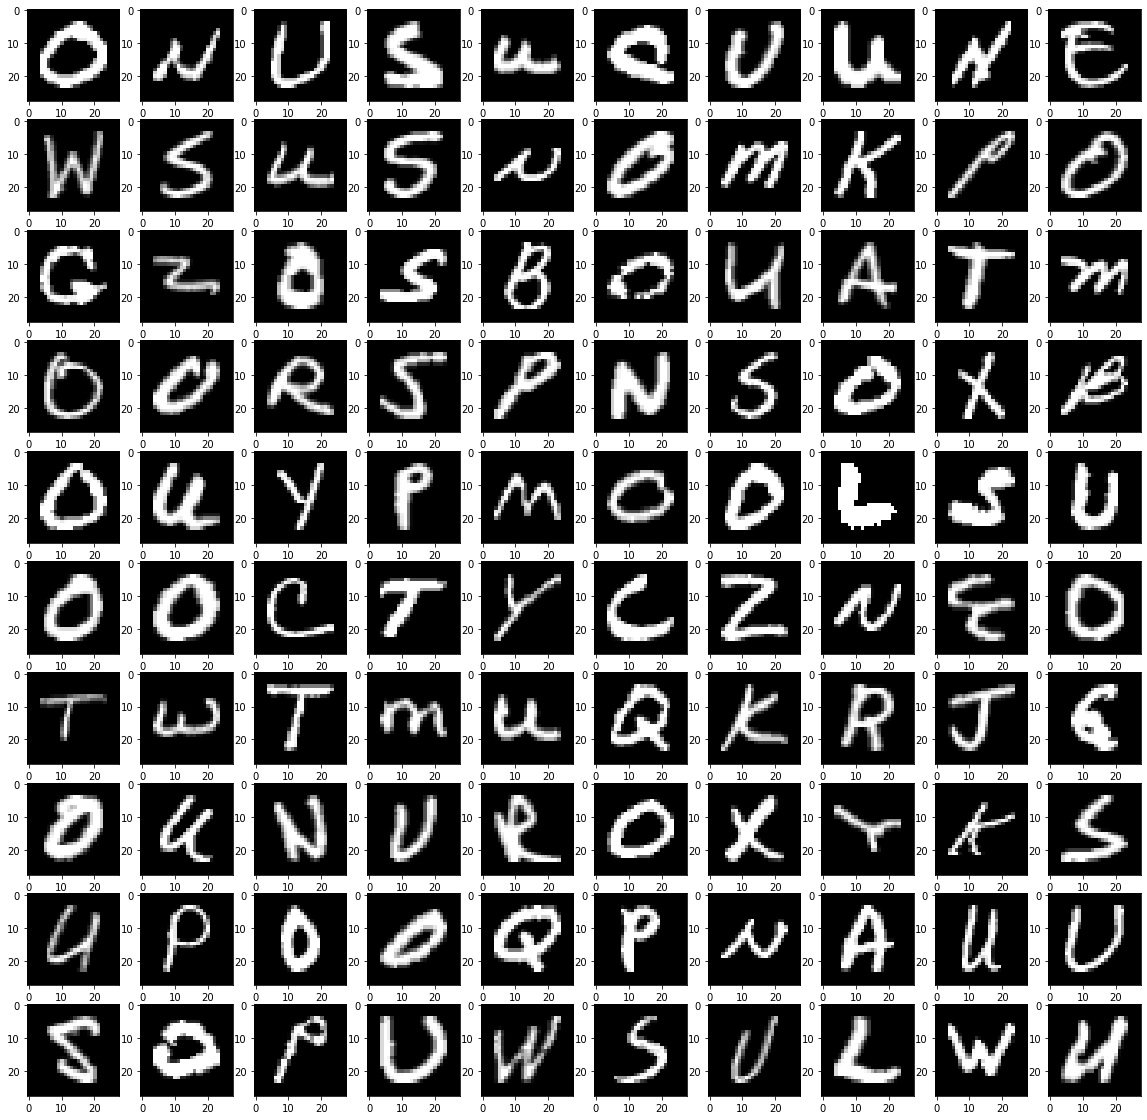

In [24]:
shuffled_data = shuffle(letter_data)
rows, cols = 10,10

plt.figure(figsize=(20,20))

for i in range (rows*cols):
    plt.subplot(cols, rows, i+1)
    plt.imshow(shuffled_data[i].reshape(28,28), interpolation="nearest", cmap="gray")
    
plt.show()


In [25]:
data = np.concatenate((digit_data, letter_data))
target = np.concatenate((digit_target, letter_target))

print(data.shape, target.shape)

(442450, 28, 28, 1) (442450,)


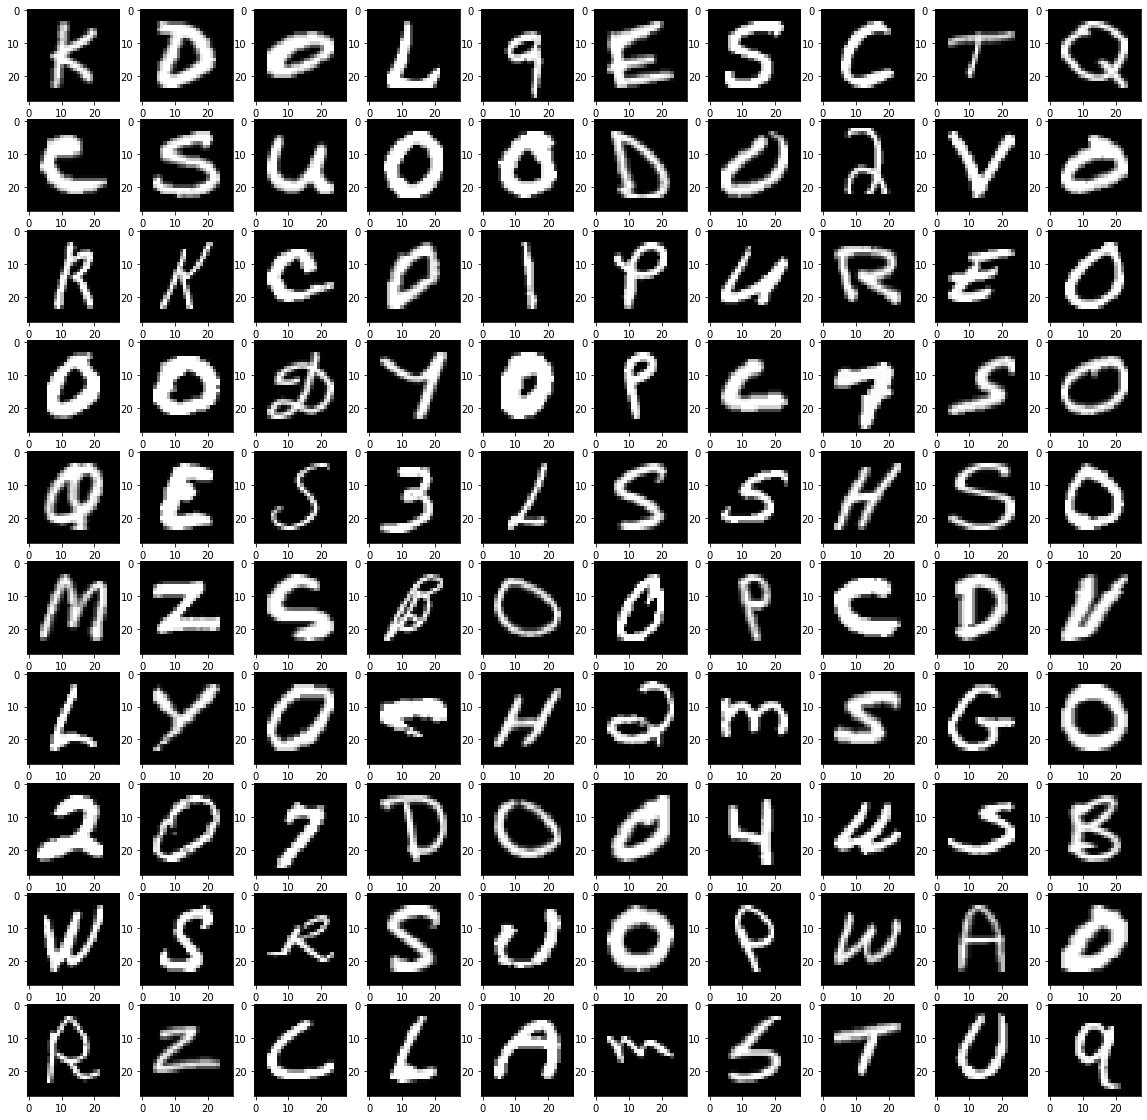

In [26]:
shuffled_data = shuffle(data)
rows, cols = 10,10

plt.figure(figsize=(20,20))

for i in range (rows*cols):
    plt.subplot(cols, rows, i+1)
    plt.imshow(shuffled_data[i].reshape(28,28), interpolation="nearest", cmap="gray")
    
plt.show()
